In [73]:
# Importamos las librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [74]:
# Carga del dataset

df = pd.read_csv('./marketing_campaign.csv', sep="\t") 


In [75]:
# Primera visualización 

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [76]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Contenido del dataset:

#### Gente

- ID: Identificador único del cliente
- Year_Birth: Año de nacimiento del cliente
- Educación: Nivel de educación del cliente
- Marital_Status: Estado civil del cliente
- Ingresos: Ingresos familiares anuales del cliente
- Kidhome: Número de niños en el hogar del cliente
- Teenhome: Número de adolescentes en el hogar del cliente
- Dt_Customer: Fecha de inscripción del cliente en la empresa
- Reciente: Número de días transcurridos desde la última compra del cliente
- Queja: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

#### Productos

- MntWines: Cantidad gastada en vino en los últimos 2 años
- MntFruits: Cantidad gastada en frutas en los últimos 2 años
- MntMeatProducts: Cantidad gastada en carne en los últimos 2 años
- MntFishProducts: Cantidad gastada en pescado en los últimos 2 años
- MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años
- MntGoldProds: Cantidad gastada en oro en los últimos 2 años

#### Promoción

- NumDealsPurchases: Número de compras realizadas con descuento
- AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario
- AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario
- AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario
- AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
- AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario
- Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

#### Lugar

- NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa
- NumCatalogPurchases: Número de compras realizadas mediante un catálogo
- NumStorePurchases: Número de compras realizadas directamente en las tiendas
- NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes

In [77]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Mini-EDA

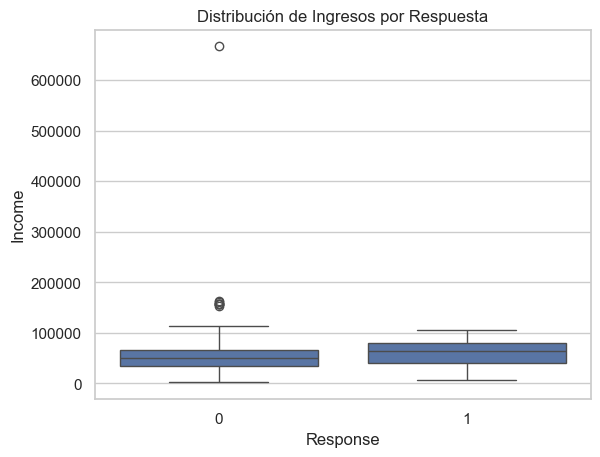

In [78]:

# Empiezo comparando los ingresos con el target
 
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Distribución de Ingresos por Respuesta')
plt.show()


**Se ve que las personas con ingresos más altos tienen una probabilidad *ligeramente* mayor de responder a la campaña.**

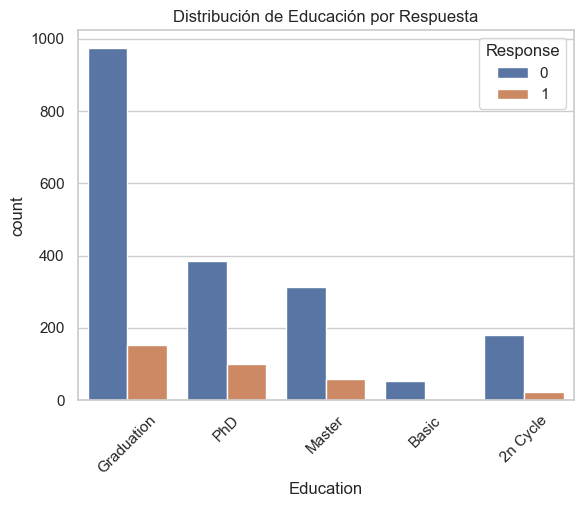

In [79]:
# Respuestas según los niveles de educación

sns.countplot(x='Education', hue='Response', data=df)
plt.title('Distribución de Educación por Respuesta')
plt.xticks(rotation=45)
plt.show()


**El nivel de educación podría tener algún impacto en la probabilidad de responder a la campaña.**
**Dentro de cada nivel de educación hay una tendencia a responder menos.**

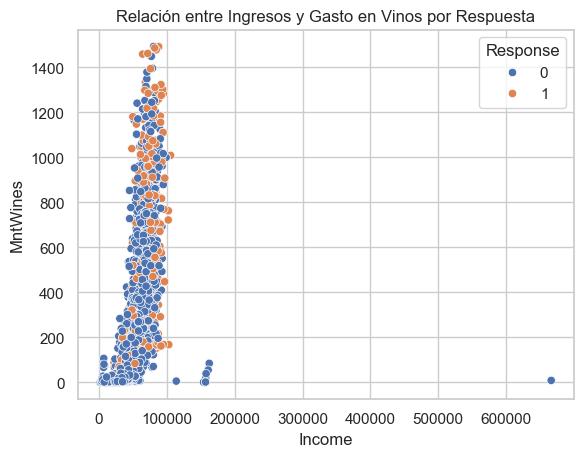

In [80]:
# vamos a comparar por ejemplo los ingresos con los gastos en vinos

sns.scatterplot(x='Income', y='MntWines', hue='Response', data=df)
plt.title('Relación entre Ingresos y Gasto en Vinos por Respuesta')
plt.show()


**Parece que las personas con mayores ingresos y que gastan más en vinos tienen más probabilidades de haber respondido positivamente a la campaña.**
*Lo que hace que esas personas podrían ser el objetivo de campañas más premium o especializadas.*
(Los que menos ingresan responden menos)

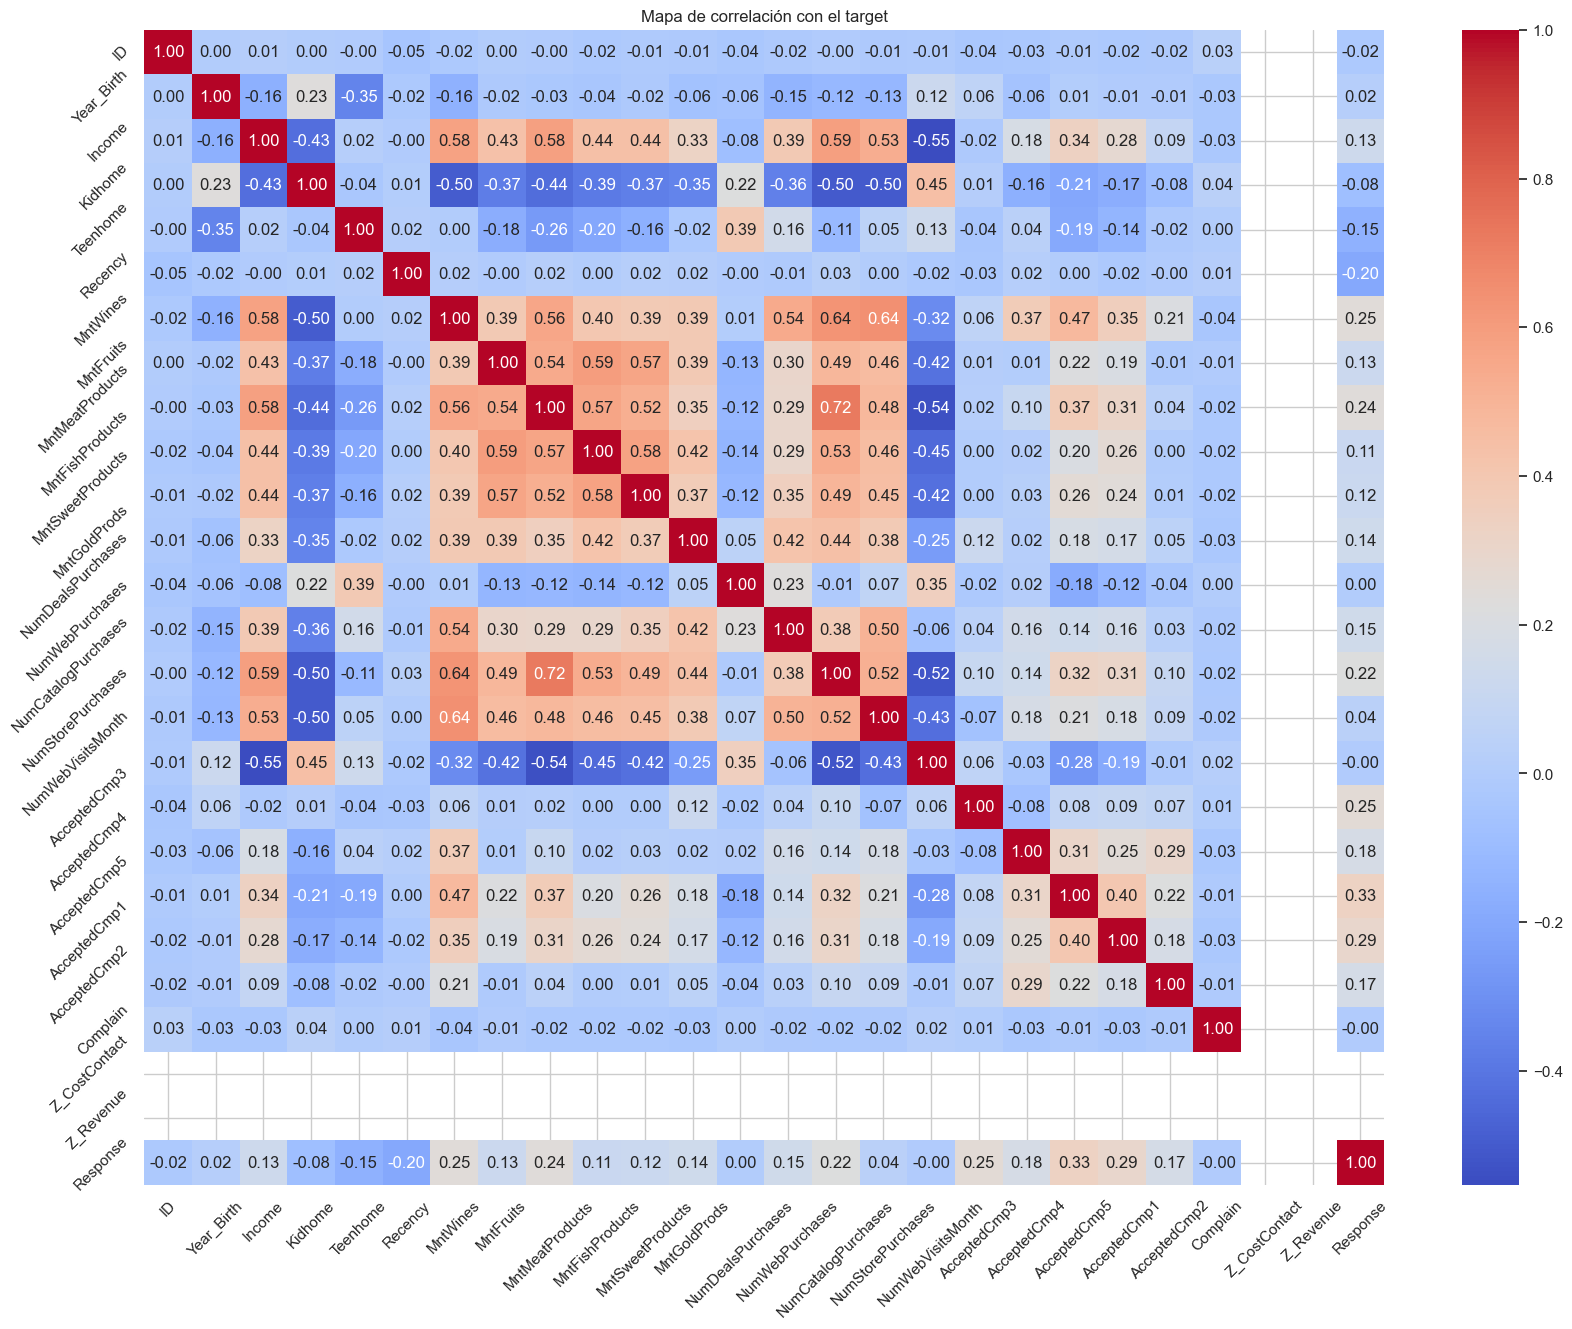

In [81]:
plt.figure(figsize=(20, 15))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlación con el target')
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()

*En el mapa de correlación vemos que relaciones son más fuertes entre las variables*

# Preparar y modelar los datos #

In [82]:

# Imputación de valores faltantes para los ingresos con la mediana y escalar las numéricas

features_numericas = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                    'NumWebVisitsMonth']
transformar_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


In [83]:
# Codificación OneHot para las categóricas

features_categoricas = ['Education', 'Marital_Status']
transformar_categoricas = OneHotEncoder(handle_unknown='ignore')


In [84]:
# juntar las numéricas y categóricas

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformar_numericas, features_numericas),
        ('cat', transformar_categoricas, features_categoricas)])


In [85]:
# Separar features y target

X = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)
y = df['Response']


In [86]:
# Dividir los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Crear el pipeline con preprocesamiento y elijo el modelo RandomForest

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


In [88]:
# Entrenar el modelo

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year_Birth', 'Income',
                                                   'Kidhome', 'Teenhome',
                                                   'Recency', 'MntWines',
                                                   'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [89]:
# Evaluación inicial del modelo

score_train = pipeline.score(X_train, y_train)
score_test = pipeline.score(X_test, y_test)

score_train, score_test

(0.9944196428571429, 0.8727678571428571)

- Precisión en el conjunto de entrenamiento: 99.44%
- Precisión en el conjunto de prueba: 87.28%

*Hay buenos resultados aunque la alta puntuación en el conjunto de entrenamiento indica que podría haber un poco de sobreajuste*

In [90]:
# Evaluación del modelo con las otras métricas:

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Cálculo de métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix, accuracy, precision, recall, f1


(array([[371,   8],
        [ 49,  20]], dtype=int64),
 0.8727678571428571,
 0.7142857142857143,
 0.2898550724637681,
 0.41237113402061853)

- Matriz de confusión:

    - Verdaderos Negativos: 371
    - Falsos Positivos: 8
    - Falsos Negativos: 49
    - Verdaderos Positivos: 20
    
  **Accuracy: 87.28%**
- Precisión: 71.43%
- Recall: 28.99% (se podría usar Gradient Boosting o XGBoost para ver si se mejora)
- F1 Score: 41.24%

In [91]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Entrenamiento con XGBoost

# Definir el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# pipeline con preprocesamiento y modelo XGBoost
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgb_model)])

# Entrena el modelo
xgb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year_Birth', 'Income',
                                                   'Kidhome', 'Teenhome',
                                                   'Recency', 'MntWines',
                                                   'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'Nu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [92]:
from sklearn.model_selection import GridSearchCV

# Ajuste de Hiperparámetros

# Definir un rango de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__max_depth': [3, 4, 5],
}

# Busqueda con validación cruzada
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='recall')

# Ejecutar
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year_Birth',
                                                                          'Income',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'Recency',
                                                                          'MntWines',
                                                                          'MntFruits',
                                                                          'MntMeatProducts',
                                                                          'MntFishProducts',
                                                                          'MntSweetProducts',
                                                                          'MntGoldProds',
                                                                          'NumDealsPurc...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='recall')

In [93]:
from sklearn.metrics import classification_report

# Evaluación del Modelo

# Predicciones con el conjunto de prueba
y_pred = grid_search.predict(X_test)

# informe clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       379
           1       0.57      0.36      0.44        69

    accuracy                           0.86       448
   macro avg       0.73      0.66      0.68       448
weighted avg       0.84      0.86      0.85       448



**Analisis:** 

- Para la clase 0, el modelo tiene una alta precisión y recall, lo que indica que identifica bien esta clase.
- Para la clase 1, la precisión no es muy alta (0.57) y el recall si es un poco mejor que antes (ha pasado de 29% a un 36%), lo que indica ha mejorado en identificar los positivos.

Sin embargo, aunque haya augmentado el recall de la clase 1, ha disminuido la precisión general y el score F1 de esa clase, siginifca que identifica a más clientes que responden, pero hay mas falsos positivos.
La precisión general (accuracy) del modelo ha bajado ligeramente.

# Conclusión:

He elegido el modelo Random Forest para predecir si un cliente responderá o no a una campaña de marketing (obteniendo una precisión del 87.28% en el conjunto de prueba antes de mejorar el recall), porque destaca qué variables son las más determinantes en la probabilidad de que este responda positivamente.

In [94]:
from joblib import dump

# para guardar el modelo
dump(pipeline, 'modelo_random_forest.joblib')


['modelo_random_forest.joblib']